  <h1 style="color:BLUE" markdown="1"> Explications de la variable FDE </h1> 


### Approche
1. Faire une régression classique et détection des variables pertinentes
2. Regression régularisé et choix de variable pertinentes
3.Approche RandomForest Regressor pour le choix des variables
4.Approche sélection de features à l'aide de sckit-learn et les Arbres de Regression
5.Comparaison des méthodes et choix des variables pertinentes qui explique au mieux la FDE
6.Analyse des variables sélectionnés

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from regressors import stats    
from sklearn.feature_selection import RFECV

In [2]:
df=pd.read_csv('../DATA/DATA_ML_FINAL.csv')

In [3]:
#suppression de la permière variable(la variable n'appartient pas à la base)
col1=df.columns[0]
df.drop(columns=[col1],axis=1,inplace=True)


**Standardisation des variables pour supprimer l'effet d'echelle**

In [4]:
sc=StandardScaler()
y=df['MONT-FDE'].values
x = df.drop(columns=['MONT-FDE'],axis=1).values
# Standardisation des features
x = StandardScaler().fit_transform(x)


- <span style="color:BLUE"> Mise en oeuvre de la Regression Classique </span>

In [9]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.076e+15
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:32:20   Log-Likelihood:            -3.0441e+05
No. Observations:             3783529   AIC:                         6.089e+05
Df Residuals:                 3783487   BIC:                         6.095e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4823.7401      0.000   3.58e+07      0.0

* Les resultats de la regression classique ci-dessusv  nous monjtre que les regresseurs sont volatiles. En d'autres termes la variance est grande. 
* Cela peut être à un problème de multicolinéarité qui a d'ailleur été observé dans la matrice de correlaltion dans le processing
* De plus L'indicateur de qualité d'ajustement R² est égale à 1. Cela peut provenir d'un surapprentissage. 



**Approche Regression pénalisé : Ridge**


In [26]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(x, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
stats.summary(model, x, y)


alpha: 0.000000
Residuals:
    Min      1Q  Median      3Q     Max
-6.9308 -0.1583  0.0003  0.1581  9.6922


Coefficients:
                Estimate  Std. Error       t value   p value
_intercept   4823.740141    0.000135  3.577894e+07  0.000000
x1             -0.000293    0.000136 -2.150300e+00  0.031528
x2              0.000707    0.000136  5.209100e+00  0.000000
x3             -0.002733    0.000188 -1.456190e+01  0.000000
x4              0.003527    0.000147  2.391470e+01  0.000000
x5              0.009107    0.000245  3.716320e+01  0.000000
x6         -94884.912515    3.155986 -3.006506e+04  0.000000
x7             -0.000493    0.000169 -2.907600e+00  0.003642
x8              0.001560    0.000164  9.495900e+00  0.000000
x9            903.981331    0.003955  2.285471e+05  0.000000
x10          4306.955444    0.002571  1.675285e+06  0.000000
x11         44734.586099    0.147830  3.026080e+05  0.000000
x12            -1.665633    0.118889 -1.401000e+01  0.000000
x13         96835.72521

*Nous pouvons constater ici qu'on a 27 variables pertinentes. Cependant le model surapprent.
Le modèl est globalement mauvais.*

**Approche : Random Forest Regressor**

In [10]:
# create regressor object 
rf = RandomForestRegressor(n_estimators = 30, random_state = 0) 
  
rf.fit(x, y)


Importance des variables pour notre modèle de Regression:


NameError: name 'names' is not defined

In [11]:
print ("Importance des variables pour notre modèle de Regression par ordre d'importance :")
names = df.columns
var_importance=sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
print(var_importance)

Importance des variables pour notre modèle de Regression:
[(0.3626, 'MONT-FNE'), (0.1686, 'CUBFAC'), (0.1409, 'CATEGORIE_PRIVE'), (0.1148, 'MONT-SOD'), (0.0801, 'MONT-TVA'), (0.0711, 'INDUST'), (0.0527, 'MONT-FDE'), (0.0025, 'CUBCONS'), (0.002, 'MONT-FRAIS-CPT'), (0.0015, 'ADMINI'), (0.0013, 'NORMAL'), (0.0005, 'MM_3'), (0.0004, 'AAAA_2018'), (0.0003, 'TOURNEE'), (0.0002, 'SOCIAL'), (0.0002, 'AAAA_2019'), (0.0001, 'O'), (0.0001, 'NOUVEAU'), (0.0001, 'MM_9'), (0.0001, 'ENR_FC'), (0.0001, 'DOMEST'), (0.0, 'RESILIE'), (0.0, 'P'), (0.0, 'MONT-ASS-TTC'), (0.0, 'MM_8'), (0.0, 'MM_7'), (0.0, 'MM_6'), (0.0, 'MM_5'), (0.0, 'MM_4'), (0.0, 'MM_2'), (0.0, 'MM_12'), (0.0, 'MM_11'), (0.0, 'MM_10'), (0.0, 'FORFAIT'), (0.0, 'ENR_FM'), (0.0, 'ENR_EN'), (0.0, 'DIAM'), (0.0, 'CEN'), (0.0, 'AAAA_2017'), (0.0, 'AAAA_2016'), (0.0, 'AAAA_2015')]


Après le Ramdom Forest nous obtenons les variables qui contribuent à un seuil de 10% à l'explication de la variable 
cible(MONT-FDE).Ces variables sont : 
- <span> MONT-FNE </span>
- <span> CUBFAC </span>
- <span> CATEGORIE_PRIVE </span>
- <span> MONT-SOD </span>
- <span> MONT-TVA </span>
- <span> INDUST </span>
- <span> CUBCONS </span>
- <span> MONT-FRAIS-CPT </span>
- <span> ADMINI </span>
- <span> NORMAL </span>

**Autre approche**

In [5]:
selecteur=RFECV(estimator=DecisionTreeRegressor(),cv=3,scoring='neg_mean_absolute_error')
selecteur.fit(x,y)
print("Le nombre optimal de features sélectioné est : %d" % selecteur.n_features_)

Le nombre optimal de features sélectioné est : 9


In [12]:
for i in range(x.shape[1]):
    if selecteur.support_[i]==True:
        print('Column: %d, Selected %s, Rank: %.3f ,variable %s' % (i, selecteur.support_[i], selecteur.ranking_[i],df.columns[i]))

Column: 4, Selected True, Rank: 1.000 ,variable CUBCONS
Column: 5, Selected True, Rank: 1.000 ,variable CUBFAC
Column: 9, Selected True, Rank: 1.000 ,variable NORMAL
Column: 10, Selected True, Rank: 1.000 ,variable INDUST
Column: 12, Selected True, Rank: 1.000 ,variable MONT-SOD
Column: 13, Selected True, Rank: 1.000 ,variable MONT-TVA
Column: 14, Selected True, Rank: 1.000 ,variable MONT-FDE
Column: 15, Selected True, Rank: 1.000 ,variable MONT-FNE
Column: 17, Selected True, Rank: 1.000 ,variable MONT-FRAIS-CPT


*Cette méthode nous a permis de confirmer la sélection des 9 variables explicatives.*

*Les Variables sélectionnées hormis les variables de Montant  :*
- <span> CUBFAC </span>
- <span> CATEGORIE_PRIVE </span>
- <span> INDUST </span>
- <span> CUBCONS </span>
- <span> ADMINI </span>
- <span> NORMAL </span>

**Analyse bivariée des variables sélectionnés et la  FDE**

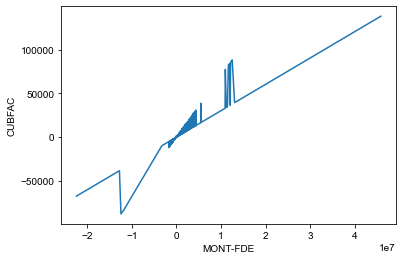

In [14]:
sns.lineplot(x = "MONT-FDE", y = "CUBFAC",data=df)
sns.set(style='dark',)
plt.show()

On remarque que les individus ayant une FDE négative ont égalément une consommation Facturé négative.


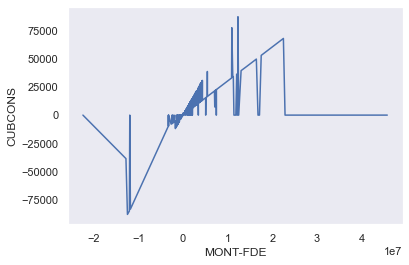

In [21]:
sns.lineplot(x = "MONT-FDE", y = "CUBCONS",data=df)
sns.set(style='dark',)
plt.show()

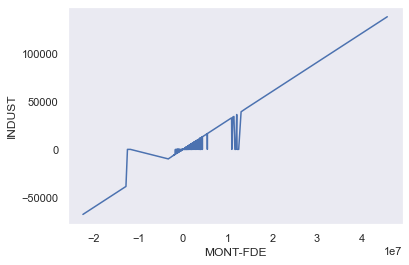

In [22]:
sns.lineplot(x = "MONT-FDE", y = "INDUST",data=df)
sns.set(style='dark',)
plt.show()

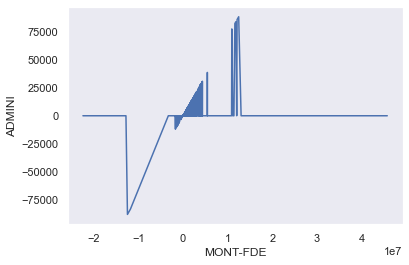

In [23]:
sns.lineplot(x = "MONT-FDE", y = "ADMINI",data=df)
sns.set(style='dark',)
plt.show()

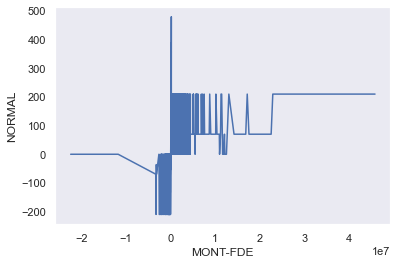

In [24]:
sns.lineplot(x = "MONT-FDE", y = "NORMAL",data=df)
sns.set(style='dark',)
plt.show()

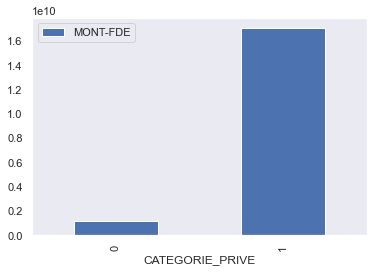

In [20]:
df.groupby(['CATEGORIE_PRIVE']).sum()[['MONT-FDE']].plot.bar()

*Nous constatons que les abonnés de la catégories privée consomment beaucoup plus que les abonnés qui ne le sont pas.*